In [ ]:
#2.1

In [18]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from fredapi import Fred

In [22]:
fred = Fred(api_key = 'f1f6be8e38a1d0b2d9bed91b003b616f')


In [26]:
bitcoinprice= fred.get_series('CBBTCUSD')
bitcoinprice

2014-12-01      370.00
2014-12-02      378.00
2014-12-03      378.00
2014-12-04      377.10
2014-12-05         NaN
                ...   
2022-04-23    39468.10
2022-04-24    39489.71
2022-04-25    40490.41
2022-04-26    38102.78
2022-04-27    39188.42
Length: 2705, dtype: float64

<AxesSubplot:>

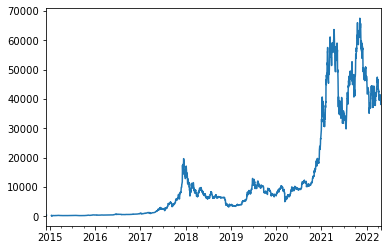

In [24]:
bitcoinprice.plot()

In [29]:
goldprice=fred.get_series('ID7108')
goldprice

2001-12-01    100.0
2002-01-01     99.8
2002-02-01    101.8
2002-03-01    106.8
2002-04-01    106.4
              ...  
2021-11-01    649.7
2021-12-01    648.0
2022-01-01    655.7
2022-02-01    654.8
2022-03-01    699.4
Length: 244, dtype: float64

<AxesSubplot:>

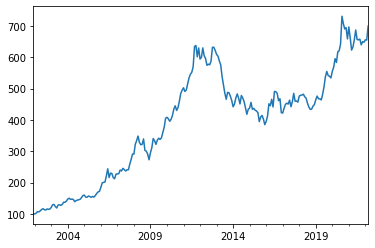

In [30]:
goldprice.plot()

In [34]:
market = fred.get_series('SP500')
market

2012-04-30    1397.91
2012-05-01    1405.82
2012-05-02    1402.31
2012-05-03    1391.57
2012-05-04    1369.10
               ...   
2022-04-21    4393.66
2022-04-22    4271.78
2022-04-25    4296.12
2022-04-26    4175.20
2022-04-27    4183.96
Length: 2608, dtype: float64

<AxesSubplot:>

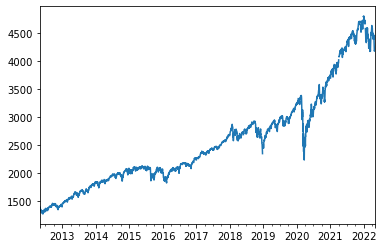

In [35]:
market.plot()

In [ ]:
#2.2


In [46]:
var1 = bitcoinprice.loc['2016-01-01':]
var2 = goldprice.loc['2016-01-01':]
var3= market.loc['2016-01-01':]

In [47]:
monthly_bitcoinprice = var1.resample('MS').first()
monthly_market = var3.resample('MS').first()


In [48]:
import numpy as np
rbt = np.log(monthly_bitcoinprice/monthly_bitcoinprice.shift(1))
rgt = np.log(var2/var2.shift(1))
rmt = np.log(monthly_market/monthly_market.shift(1))

In [49]:
rbt

2016-01-01         NaN
2016-02-01   -0.159771
2016-03-01    0.153831
2016-04-01   -0.036207
2016-05-01    0.089924
                ...   
2021-12-01   -0.063002
2022-01-01   -0.181097
2022-02-01   -0.208950
2022-03-01    0.136510
2022-04-01    0.039951
Freq: MS, Length: 76, dtype: float64

In [50]:
rgt

2016-01-01         NaN
2016-02-01    0.043108
2016-03-01    0.089917
2016-04-01   -0.012938
2016-05-01    0.044569
                ...   
2021-11-01    0.015824
2021-12-01   -0.002620
2022-01-01    0.011813
2022-02-01   -0.001374
2022-03-01    0.065893
Length: 75, dtype: float64

In [51]:
rmt

2016-01-01         NaN
2016-02-01   -0.037089
2016-03-01    0.019895
2016-04-01    0.046628
2016-05-01    0.004164
                ...   
2021-12-01   -0.022053
2022-01-01    0.060928
2022-02-01   -0.053532
2022-03-01   -0.054297
2022-04-01    0.054147
Freq: MS, Length: 76, dtype: float64

In [52]:
#2.3

In [53]:
rbt.corr(rgt)

0.14440618264111113

In [55]:
#0.1444 means that btcprice's rate of return and goldprice's rate of freturn have a low correlation.ntc not a good subtitiution for  the gold, maybe bacause  Bitcoin is a new form of high-risk high-retasset asset but gold not.

In [56]:
rbt.corr(rmt)

0.2249216156953669

In [57]:
#It shows that the price of btc is more closely related to the market.

In [58]:
import statsmodels.formula.api as smf

In [59]:
#fit 1

In [60]:
rbt1 = pd.DataFrame(rbt,columns=['rbt'])
rmt1 = pd.DataFrame(rmt,columns=['rmt'])
df1 = pd.concat([rbt1,rmt1],axis=1)

In [61]:
fit1 = smf.ols('rbt~rmt',data=df1).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                    rbt   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.890
Date:                Fri, 29 Apr 2022   Prob (F-statistic):             0.0524
Time:                        00:08:04   Log-Likelihood:                 7.3871
No. Observations:                  75   AIC:                            -10.77
Df Residuals:                      73   BIC:                            -6.139
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0508      0.026      1.929      0.0

In [62]:
#alpha is 0.0508 and the beta is 1.0520.For every $1 increase in expected bitcoin returns, the Sharpe Index increases by 1.05,implying a positive correlation. r-squared of 0.05 means that 5% of the variance can be explained.

In [63]:
#fit 2 

In [64]:
rgt1 = pd.DataFrame(rgt,columns=['rgt'])
df2 = pd.concat([rgt1,rmt1],axis=1)

In [65]:
fit2 = smf.ols('rgt~rmt',data=df2).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                    rgt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.03040
Date:                Fri, 29 Apr 2022   Prob (F-statistic):              0.862
Time:                        00:20:42   Log-Likelihood:                 134.39
No. Observations:                  74   AIC:                            -264.8
Df Residuals:                      72   BIC:                            -260.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0079      0.005      1.664      0.1

In [66]:
#alpha is 0.0079 and the beta is -0.0168.For every $1 increase in the expected return on gold, the Sharpe Index decreases by 0.0168, implying a negative correlation. r-squared of 0.000 represents a poor fit, and from this fitted model the gold price is a low risk, low return asset.